In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('ex2data1.txt', names=['exam1', 'exam2', 'admitted'])
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


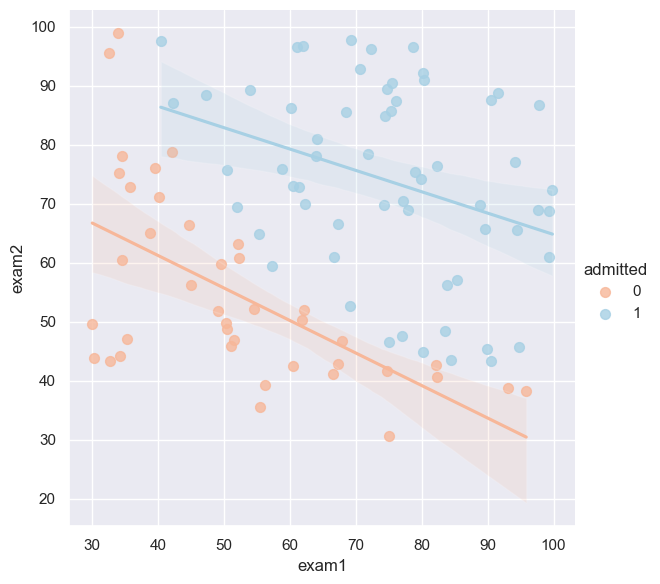

In [11]:
sns.set(context="notebook", style="darkgrid", palette=sns.color_palette("RdBu", 2))

sns.lmplot(x='exam1', y='exam2', hue='admitted', data=data,
           height=6, 
           fit_reg=True, 
           scatter_kws={"s": 50})
plt.show()

In [19]:
def get_X(df):
    ones = pd.DataFrame({'ones': np.ones(len(df))})
    data = pd.concat([ones, df], axis=1)
    return data.iloc[:, :-1].values

def get_y(df):
    return np.array(df.iloc[:, -1])

def normalize_feature(df):
    return df.apply(lambda column: (column - column.mean()) / column.std())

In [20]:
X = get_X(data)
print(X.shape)

y = get_y(data)
print(y.shape)

(100, 3)
(100,)


In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

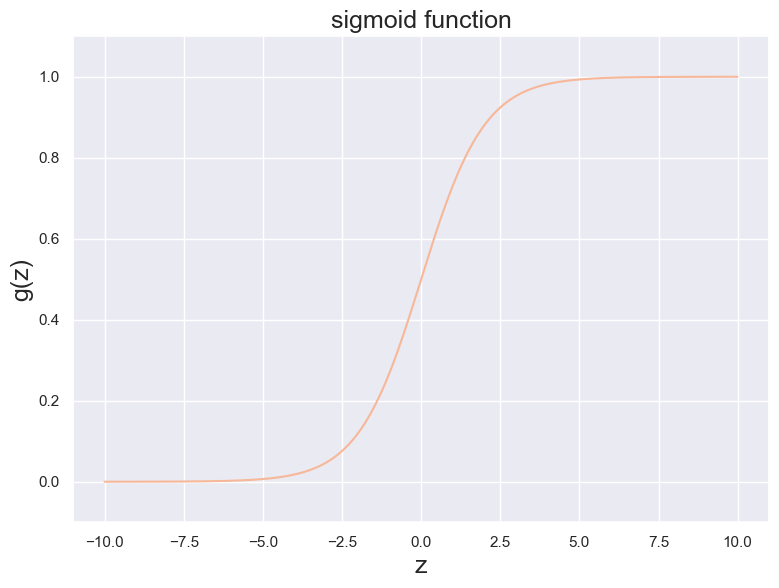

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(np.arange(-10, 10, step=0.01), sigmoid(np.arange(-10, 10, step=0.01)))
ax.set_ylim((-0.1,1.1))
ax.set_xlabel('z', fontsize=18)
ax.set_ylabel('g(z)', fontsize=18)
ax.set_title('sigmoid function', fontsize=18)
plt.show()

In [23]:
theta = theta = np.zeros(3)
theta

array([0., 0., 0.])

In [26]:
def cost(theta, X, y):
    ''' cost fn is -(theta) for you to minimize'''
    return np.mean(-y * np.log(sigmoid(X @ theta)) - (1 - y) * np.log(1 - sigmoid(X @ theta)))

In [27]:
cost(theta, X, y)

0.6931471805599453

In [29]:
def gradient(theta, X, y):
    return (1 / len(X)) * X.T @ (sigmoid(X @ theta) - y)

In [30]:
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [31]:
import scipy.optimize as opt

In [32]:
res = opt.minimize(fun=cost, x0=theta, args=(X, y), method='Newton-CG', jac=gradient)

In [33]:
print(res)

     fun: 0.20349770531788094
     jac: array([3.00986046e-06, 1.33871832e-06, 1.86577910e-04])
 message: 'Optimization terminated successfully.'
    nfev: 73
    nhev: 0
     nit: 29
    njev: 198
  status: 0
 success: True
       x: array([-25.15632676,   0.20619166,   0.20143109])


In [34]:
def predict(x, theta):
    prob = sigmoid(x @ theta)
    return (prob >= 0.5).astype(int)

In [35]:
final_theta = res.x
y_pred = predict(X, final_theta)

print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        40
           1       0.90      0.92      0.91        60

    accuracy                           0.89       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.89      0.89      0.89       100



In [36]:
print(res.x)

[-25.15632676   0.20619166   0.20143109]


In [37]:
coef = -(res.x / res.x[2])
print(coef)

x = np.arange(130, step=0.1)
y = coef[0] + coef[1]*x

[124.88800477  -1.02363377  -1.        ]


In [40]:
data.describe()

,exam1,exam2,admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


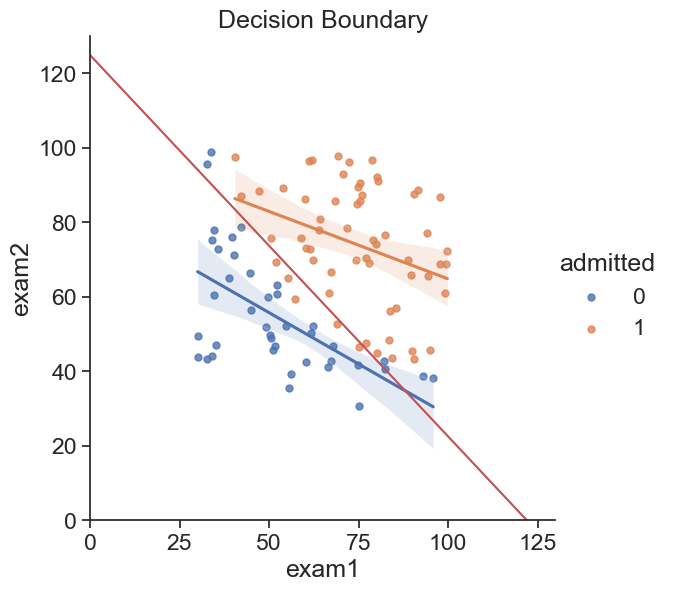

In [43]:
sns.set(context="notebook", style="ticks", font_scale=1.5)

sns.lmplot(x='exam1', y='exam2', hue='admitted', data=data,
           height=6, 
           fit_reg=True, 
           scatter_kws={"s": 25})
plt.plot(x, y, 'r')
plt.xlim(0, 130)
plt.ylim(0, 130)
plt.title('Decision Boundary')

plt.show()